In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
from pathlib import Path
import numpy as np
Path('./figures').mkdir(exist_ok=True)

### Load the model

In [2]:
from rearrangement.evaluation.scene_prediction import ScenePrediction
log_dir = Path('../../data/models/')
run_id = 'state-prediction-71538'

model = ScenePrediction.from_run(log_dir, run_id)
MASK_THRESHOLD = 0.9
BANDWIDTH = 0.04

### Figure 3

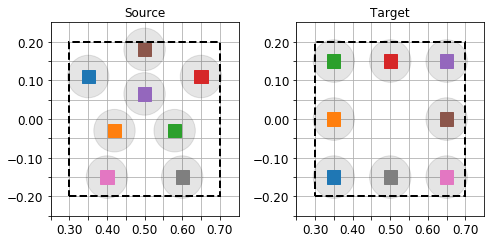

In [3]:
from rearrangement.figures.figures import aabbs_from_centers, plot_src_tgt_config
p = './figures/configs.pdf'
radius = 0.055
src = np.array([
    [0.35, 0.11],
    [0.42, -0.03],
    [0.58, -0.03],
    [0.65, 0.11],
    [0.5, 0.065],
    [0.5, 0.18],
    [0.4, -0.15],
    [0.6, -0.15],
])
tgt = np.array([
    [0.35, -0.15],
    [0.35, -0.0],
    [0.35, 0.15],
    [0.50, 0.15],
    [0.65, 0.15],
    [0.65, 0.0],
    [0.65, -0.15],
    [0.50, -0.15],
])
src = aabbs_from_centers(src, np.full(len(src), 0.035))
tgt = aabbs_from_centers(tgt, np.full(len(tgt), 0.035))
fig, axs = plot_src_tgt_config(src, tgt, path=p)
fig

### Predictions in the Figure 5

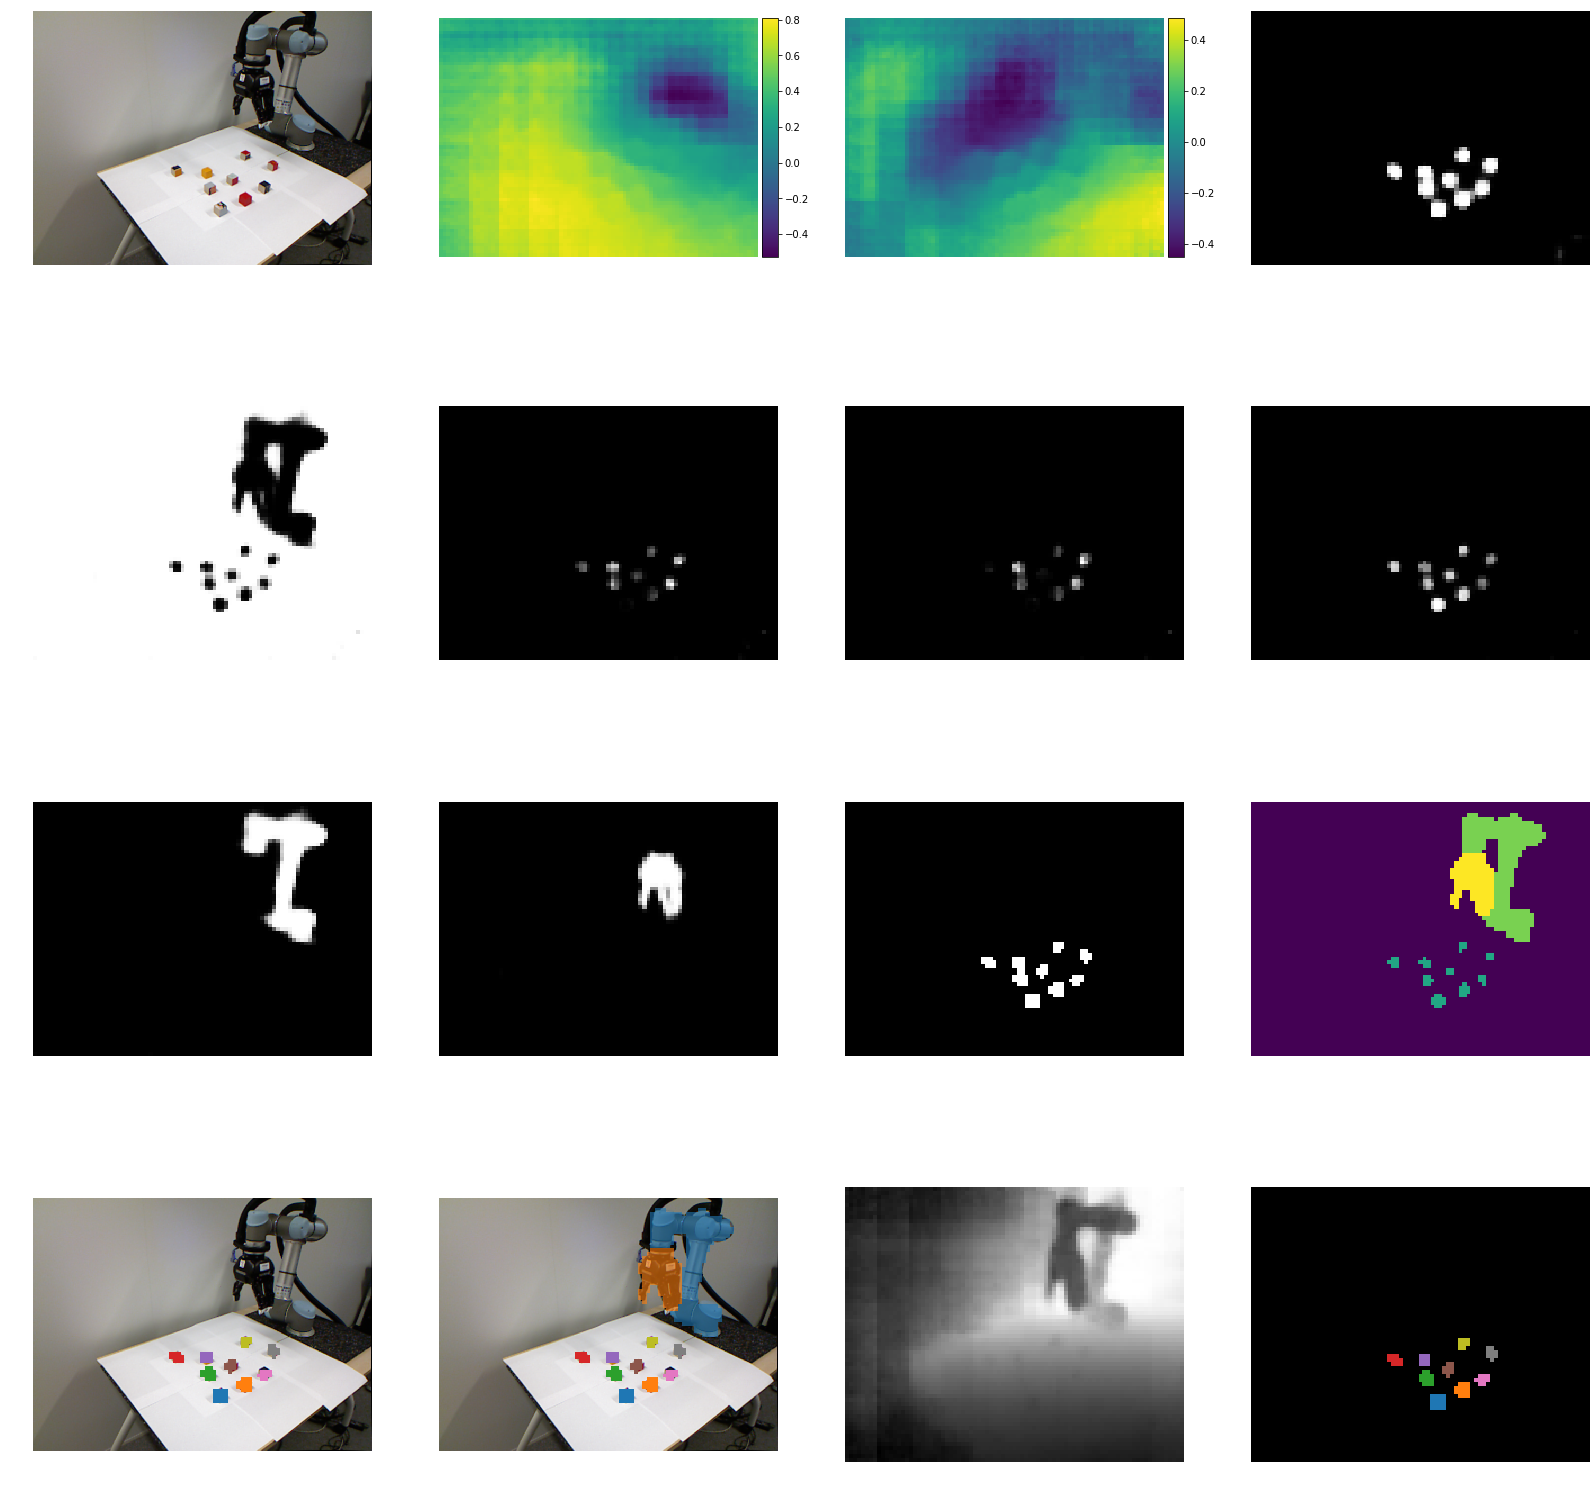

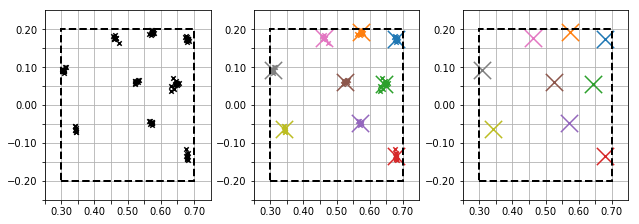

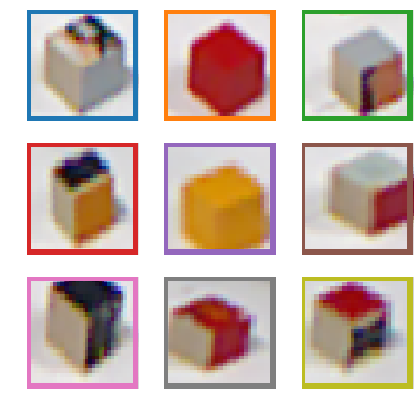

In [7]:
from rearrangement.figures.figures import save_real_predictions
n_objects, im_id = 9, 38
save_real_predictions(model, MASK_THRESHOLD, BANDWIDTH, im_id, n_objects=n_objects)

### Figures 6  and 8

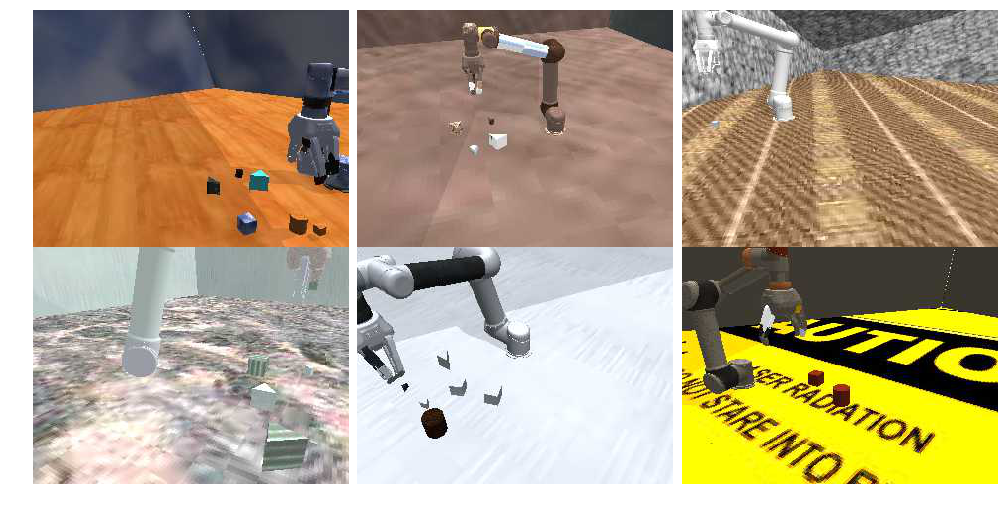

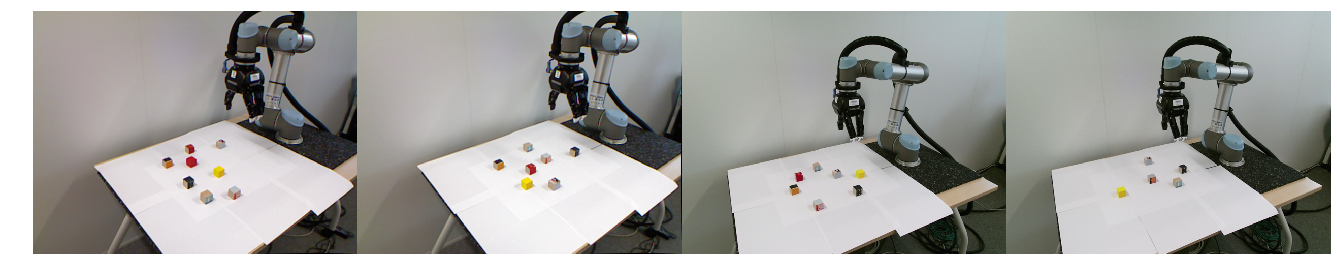

In [8]:
from rearrangement.figures.figures import save_train_test_images
synth_ids = [85442, 48753, 68702, 54822, 49941, 19798]
real_ids_n_objects = [732, 992, 779, 887]
save_train_test_images(synth_ids, real_ids_n_objects)

### Figure 9

In [9]:
from rearrangement.evaluation.state_eval import StateEvaluation
state_eval = StateEvaluation('real-cubes-1to12', model.config)

  0%|          | 0/38 [00:00<?, ?it/s]

Loading real-cubes-1to12 validation data


100%|██████████| 38/38 [00:12<00:00,  3.00it/s]


In [10]:
summary, _, _ = state_eval.evaluate(model, mask_threshold=MASK_THRESHOLD, bandwidth=BANDWIDTH, print_summary=False)

100%|██████████| 38/38 [01:18<00:00,  1.78s/it]


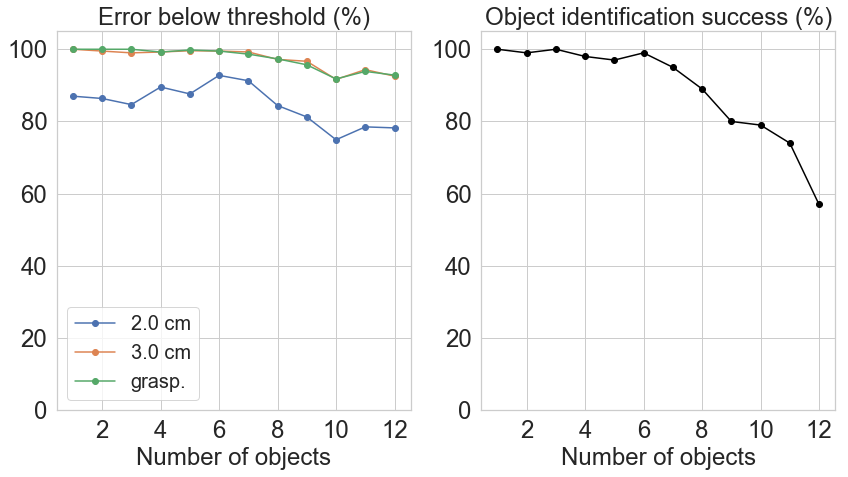

In [11]:
from rearrangement.figures.figures import plot_vision_eval
import seaborn as sns
sns.set()
sns.set_style('whitegrid')
plot_vision_eval(summary)